[This is the link for this homework](https://apmonitor.com/do/index.php/Main/DynamicOptimizationBenchmarks0). I need to pick 5 benchmark problems and do them.

# Problem 2

$$
\begin{gathered}
\min _{u(t)} x_{4}\left(t_{f}\right) \\
\text { subject to } \\
\frac{d x_{1}}{d t}=x_{2} \\
\frac{d x_{2}}{d t}=-x_{3} u+16 t-8 \\
\frac{d x_{3}}{d t}=u \\
\frac{d x_{4}}{d t}=x_{1}^{2}+x_{2}^{2}+0.0005\left(x_{2}+16 t-8-0.1 x_{3} u^{2}\right)^{2} \\
x(0)=[0 \quad-1 -\sqrt{5} \quad 0]^{T} \\
-4 \leq u \leq 10 \\
t_{f}=1
\end{gathered}
$$

In [20]:
import numpy as np
from gekko import GEKKO

m = GEKKO()
m.time = np.linspace(0,1,101)
x1 = m.Var(value=0)
x2 = m.Var(-1)
x3 = m.Var(-np.sqrt(5))
x4 = m.Var(0)
u = m.MV(7, lb = -4, ub = 10)
u.STATUS = 1 #use for optimization
t = m.Var(0)

mask = np.zeros(101)
mask[-1] = 1
final = m.Param(value=mask)

m.Equation(t.dt() == 1) #why is this necessary?
m.Equation(x1.dt() == x2)
m.Equation(x2.dt() == -x3*u + 16*t - 8)
m.Equation(x3.dt() == u)
m.Equation(x4.dt() == x1**2 + x2**2 + .0005*(x2 + 16*t - 8 - 0.1*x3*u**2)**2)

m.Minimize(x4 * final)

m.options.IMODE = 6 #simultaneous control
# m.options.MV_TYPE=1

m.solve()



apm 66.219.236.170_gk_model12 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           1500
 Number of total equations: -         1400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

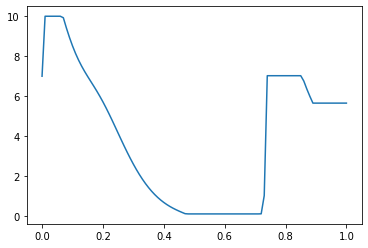

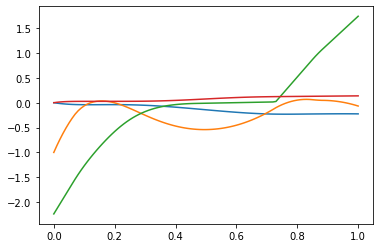

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(m.time, u)

plt.figure()
plt.plot(m.time,x1, m.time,x2, m.time,x3, m.time,x4)

# Problem 3

$$
\begin{gathered}
\max _{u(t)} x_{2}\left(t_{f}\right) \\
\text { subject to } \\
\frac{d x_{1}}{d t}=-\left(u+0.5 u^{2}\right) x_{1} \\
\frac{d x_{2}}{d t}=u x_{1} \\
x(0)=\left[\begin{array}{ll}
1 & 0
\end{array}\right]^{T} \\
0 \leq u \leq 5 \\
t_{f}=1
\end{gathered}
$$

apm 66.219.236.170_gk_model14 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            900
 Number of total equations: -          800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

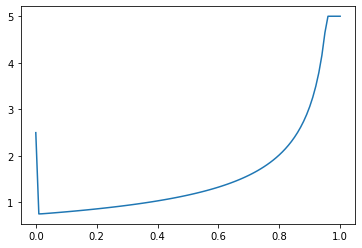

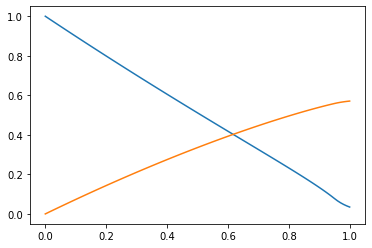

In [23]:
m = GEKKO()
m.time = np.linspace(0,1,101)

x1 = m.Var(1)
x2 = m.Var(0)
u = m.MV(2.5, lb=0, ub=5)
u.STATUS = 1

mask = np.zeros(101)
mask[-1] = 1
final = m.Param(mask)

m.Equation(x1.dt() == -(u + 0.5*u**2)*x1)
m.Equation(x2.dt() == u*x1)

m.Maximize(x2 * final)

m.options.IMODE = 6

m.solve()

plt.plot(m.time, u)

plt.figure()
plt.plot(m.time, x1, m.time, x2)

